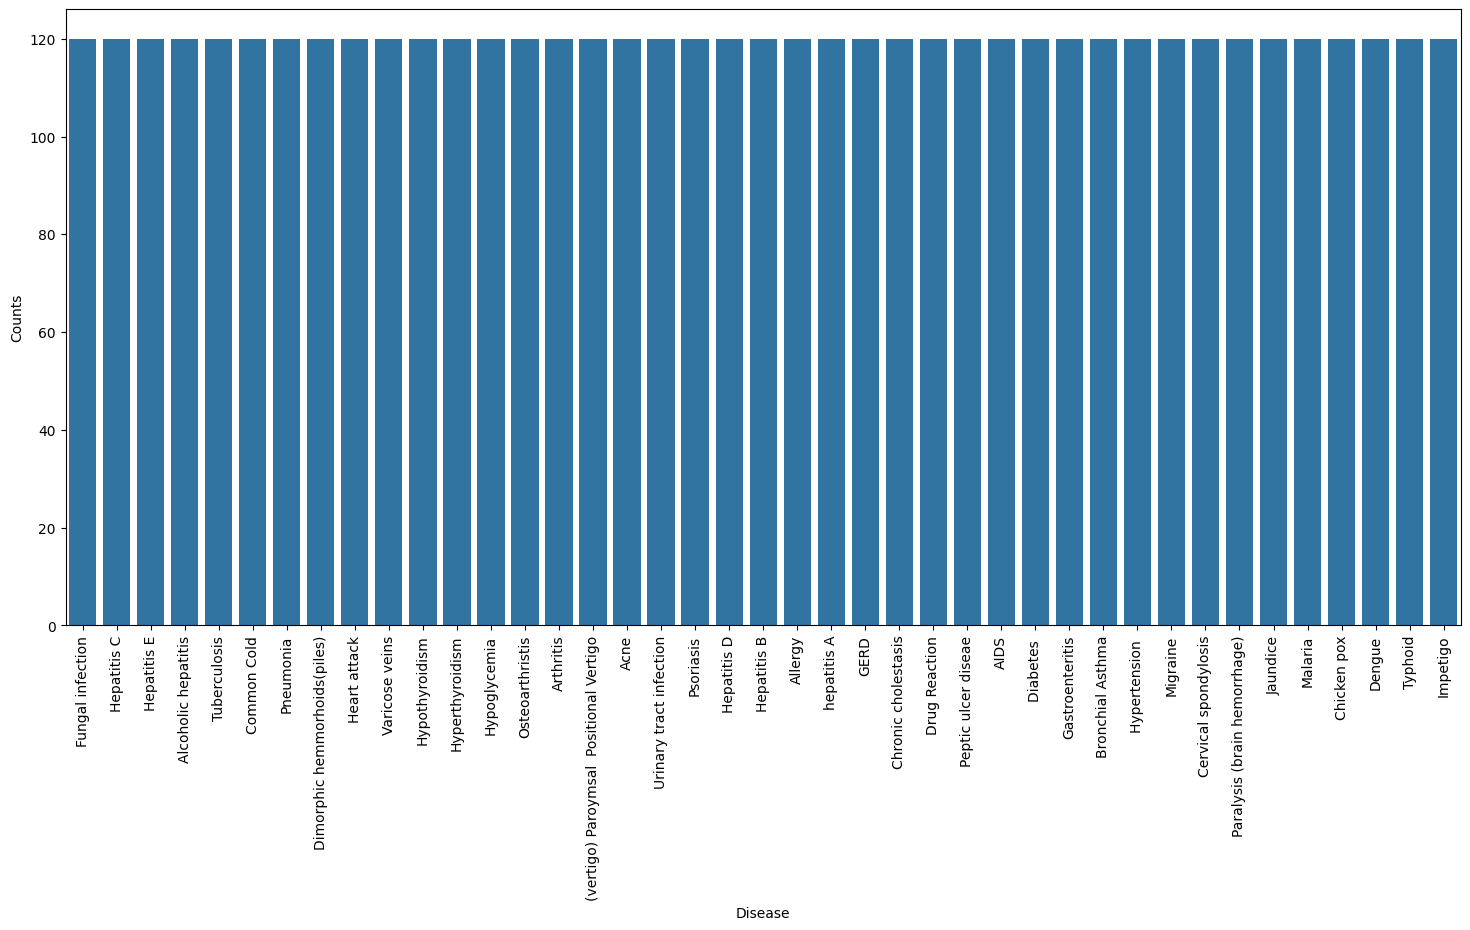

Train: (3936, 132, 1), (3936, 41)
Test: (984, 132, 1), (984, 41)
Epoch 1/50
99/99 [==============================] - 3s 21ms/step - loss: 1.3835 - accuracy: 0.6963 - val_loss: 0.0325 - val_accuracy: 0.9987
Epoch 2/50
99/99 [==============================] - 2s 22ms/step - loss: 0.0834 - accuracy: 0.9794 - val_loss: 0.0067 - val_accuracy: 0.9987
Epoch 3/50
99/99 [==============================] - 2s 15ms/step - loss: 0.0326 - accuracy: 0.9940 - val_loss: 0.0027 - val_accuracy: 0.9987
Epoch 4/50
99/99 [==============================] - 1s 15ms/step - loss: 0.0259 - accuracy: 0.9933 - val_loss: 0.0029 - val_accuracy: 0.9987
Epoch 5/50
99/99 [==============================] - 1s 14ms/step - loss: 0.0191 - accuracy: 0.9952 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 6/50
99/99 [==============================] - 1s 14ms/step - loss: 0.0235 - accuracy: 0.9949 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 7/50
99/99 [==============================] - 1s 15ms/step - loss: 0.0131 - accurac

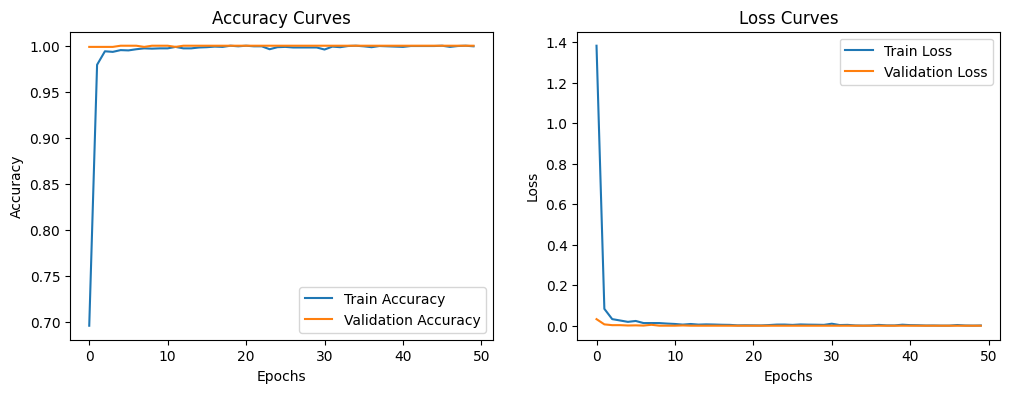

2/2 [==============================] - 0s 8ms/step - loss: 6.2802e-07 - accuracy: 1.0000
New dataset accuracy: 100.00%
2/2 [==============================] - 0s 6ms/step
['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A' 'Hepatitis B' 'Hepatitis C'
 'Hepatitis D' 'Hepatitis E' 'Alcoholic hepatitis' 'Tuberculosis'
 'Common Cold' 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Heart attack'
 'Varicose veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthristis' 'Arthritis' '(vertigo) Paroymsal  Positional Vertigo'
 'Acne' 'Urinary tract infection' 'Psoriasis' 'Impetigo']


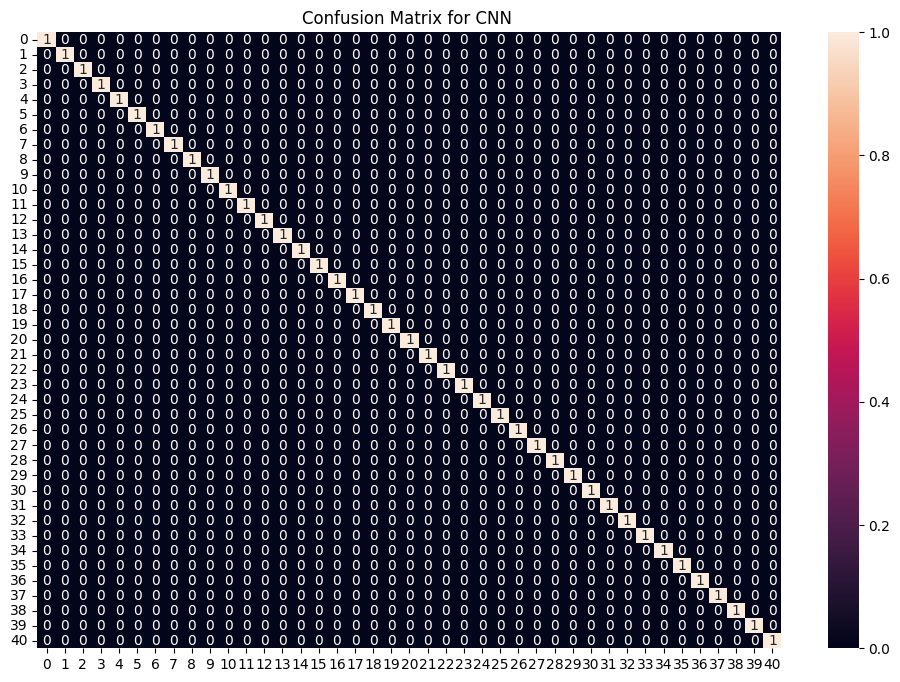

1/1 [==============================] - 0s 21ms/step
Impetigo


In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, save_model  # Import save_model
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import accuracy_score, confusion_matrix

# Reading the train.csv by removing the last column since it's an empty column
data = pd.read_csv('/content/Training (1).csv').dropna(axis=1)

# Checking whether the dataset is balanced or not
disease_counts = data["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})
plt.figure(figsize=(18, 8))
sns.barplot(x="Disease", y="Counts", data=temp_df)
plt.xticks(rotation=90)
plt.show()

# Encoding the target value into numerical value using LabelEncoder
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])

# Splitting data into features and labels
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
# One-hot encode the labels
y_categorical = to_categorical(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=24)

# Reshape input for CNN
X_train = np.expand_dims(X_train.values, axis=2)
X_test = np.expand_dims(X_test.values, axis=2)

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

# Define the CNN model
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_categorical.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32)

# Save the trained model to an HDF5 file
model.save('disease_prediction_model')

# Plotting the accuracy and loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Load the new test dataset
new_data = pd.read_csv('/content/Testing (1).csv').dropna(axis=1)

# Preprocess the new dataset
X_new = new_data.iloc[:, :-1]
y_new = encoder.transform(new_data.iloc[:, -1])
y_new_categorical = to_categorical(y_new)

# Reshape input for CNN
X_new = np.expand_dims(X_new.values, axis=2)

# Evaluate the model on the new dataset
new_loss, new_accuracy = model.evaluate(X_new, y_new_categorical)
print(f'New dataset accuracy: {new_accuracy * 100:.2f}%')

# Make predictions on the new dataset
predictions = model.predict(X_new)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)
predicted_labels = encoder.inverse_transform(predicted_classes)

# Print or save the predictions
print(predicted_labels)

# Confusion matrix
cf_matrix = confusion_matrix(y_new, predicted_classes)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for CNN ")
plt.show()

# Function to predict disease based on symptoms
symptom_index = {symptom: index for index, symptom in enumerate(X.columns)}
def predictDisease(symptoms):
    symptoms = symptoms.split(",")

    # Create input data for the model
    input_data = [0] * len(symptom_index)
    for symptom in symptoms:
        symptom = symptom.strip()
        if symptom in symptom_index:
            index = symptom_index[symptom]
            input_data[index] = 1
        else:
            print(f"Warning: Symptom '{symptom}' not found in dataset")

    # Reshape input data
    input_data = np.array(input_data).reshape(1, -1)
    input_data = np.expand_dims(input_data, axis=2)

    # Generate prediction
    prediction = model.predict(input_data)
    predicted_class = np.argmax(prediction, axis=1)
    predicted_label = encoder.inverse_transform(predicted_class)[0]

    return predicted_label

# Test the function
print(predictDisease("fever,dry cough,tiredness"))


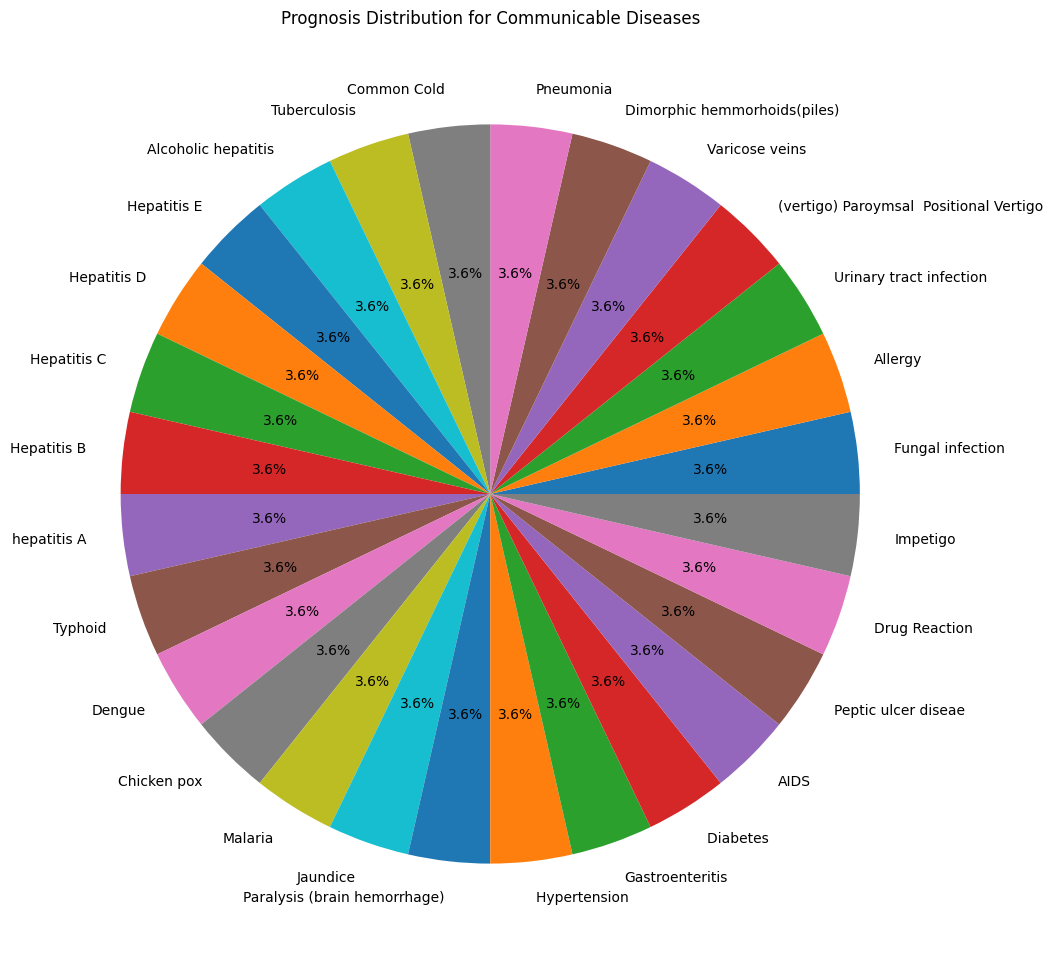

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/Training (1).csv')

# Identify non-communicable diseases
non_communicable_diseases = ['Hypothyroidism', 'Psoriasis', 'GERD', 'Chronic cholestasis',
                             'Osteoarthristis', 'Hypoglycemia', 'Acne', 'Diabetes', 'Hypertension',
                             'Cervical spondylosis', 'Hyperthyroidism', 'Migraine', 'Bronchial Asthma',
                             'Arthritis', 'Heart attack']

# Remove non-communicable diseases from the dataset
df_communicable = df[~df['prognosis'].isin(non_communicable_diseases)]

# Count the prognosis for communicable diseases
counts = df_communicable["prognosis"].value_counts()

# Plot the pie chart
plt.figure(figsize=(20, 12))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Prognosis Distribution for Communicable Diseases')
plt.show()